# **Comparative analysis of FINBERT, BERT and traditional models of classification**

We are conducting a comaparative analysis of pretrained FINBERT, pretrained BERT and traditional models viz., logistic regression and support vector classification to find the best model for identifying and predicting the sentiment of text. 


The second file data.csv is the dataset of financial sentences with sentiment labels. It consists of 5842 sentences categorised by sentiment (positive, negative, and neutral). We follow the same steps as in the as in previous data files (data1_all.ipynb, data1_FINBERT.ipynb)  to examine the consistency of the model.

If the sentiment of the phrase is positive it means that an invester can consider investing in stock market, if negative then invester must refrain investing and if sentiment is neutral then further investigation is suggested.

This notebook includes BERT and traditional models while FINBERT is trained separately in another notebook .
(This is because training everything togerther required high ram and was incapable to run on free collab version)

During the model fine-tuning process, several techniques were employed to ensure the best possible performance. First, the data was meticulously cleaned to remove any noise or irrelevant information that could potentially bias the model's learning. Next, various hyperparameters such as learning rate, batch size, and number of epochs were meticulously adjusted to enhance the model's ability to learn from the data. A stratified sampling technique was used to split the data into training and testing sets, ensuring that each set was representative of the overall distribution of data. This stratified approach assists in preserving the proportion of each class, contributing to a more robust and accurate model.

In [ ]:
!pip uninstall transformers    # TRANSFORMERS INSTALLING FOR FINBERT
!pip install --upgrade transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.7 MB/s eta 0:00:00


In [ ]:

!pip install numpy
!pip install torch==1.7.1
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.7.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install datasets  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 22.7 MB/s eta 0:00:00


## Importing required libraries

**transformers**: This package provides an interface pretrained BERT and FINBERT models to perform sentiment analysis.  

**numpy**: It is a powerful tool to deal with data preprocessing, handling input arrays, multidimensional data and performs mathematical computations efficiently.

**torch**: Also known as PyTorch, is a open-source machine learning library. AS BERT and FINBERT models are built using deep learning architechture, PyTorch is commonly used in these models.

**scikit-learn**: provides tools and algorithms in machine learning and helps in tasks like data preprocessing, feature extraction, model evaluation, and classification and also offers convinient APIs.


**datsets**: The 'datasets' library is a Python package that provides an efficient way to work with various datasets, including text and image datasets. It provides a standardized interface for loading and processing datasets, making it easier to work with different datasets and models.

**Matplotlib**: It is a powerful library in Python used for data visualization. It provides a wide range of tools for creating graphs, plots, charts, and so on.

**Pyplot**: It is a collection of functions in the Matplotlib library. It enables the quick and easy creation of a number of plot types, including line plots, scatter plots, bar plots, and histograms.

**Seaborn**: It is a Python data visualization library based on Matplotlib. Seaborn provides a high-level interface for creating informative and attractive statistical graphics, and it is used to plot the histograms here.

**sklearn.model_selection**: The model_selection module in sklearn library provides several functions for model selection and evaluation.

**sklearn.metrics**: The sklearn.metrics module provides a suite of functions and utilities for evaluating the performance of machine learning models such as: accuracy_score, precision_score, recall_score.

**wordcloud**: It is a Python library used to generate word clouds, which are graphical representations of the most frequent words in a text corpus.

**nltk**: Also known as Natural Language Toolkit. It is a Python library used for working with human language data. It provides a suite of text processing libraries for tokenization, stemming, tagging, parsing, etc.


In [ ]:
import numpy as np
import pandas as pd 
from transformers import BertTokenizer, Trainer, BertForSequenceClassification, TrainingArguments
from datasets import Dataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

*Note: the following code is for demonstration purpose. Please use GPU for fast inference on large scale dataset.*

In [ ]:
torch.cuda.is_available()      # Check if a CUDA-capable GPU is available

True

## Importing and loading dataset

Function drive.mount() from *'drive'* package is used to gain access to google drive. A window pops on the screen which asks for users permission to gain access to drive. One must make sure they have their dataset uploaded on google drive in folder name 'BERT'.

In [ ]:
#Importing our dataset from google drive 
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'
%pwd

Mounted at /content/gdrive
/content/gdrive/MyDrive


'/content/gdrive/MyDrive'

In [ ]:
%cd BERT

/content/gdrive/MyDrive/BERT


 Dataset is imported using pd.read_csv() function.

In [ ]:
#Import
df = pd.read_csv('data.csv')
pd.set_option('display.max_colwidth', None) #to enable viewer to read entire text in the column
df.head()

,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral


## Preprocessing: Cleaning, removing stopwords, lemmatization

Next step is cleaning the data to make it suitable to load it in our models. This is an essential step as feeding raw data will not give us good results.

In the snippet below we creating an array 'possible_labels' that contains all unique values in the 'Sentiment' column of the DataFrame 'df

In [ ]:
#get unique values    
possible_labels = df.Sentiment.unique()  
possible_labels

array(['positive', 'negative', 'neutral'], dtype=object)

It is evident from output that we have three unique values: positive, negative and neutral

In [ ]:
# Creating an empty dictionary 'label_dict' to store the label-index pairs
label_dict = {}
for index, possible_label in enumerate(possible_labels):                # Iterating over each label in 'possible_labels' 
    if possible_label == 'neutral':
        label_dict[possible_label] = 0                                  # Adding the label-index pair to the 'label_dict' dictionary
                                        
    elif possible_label == 'negative':
        label_dict[possible_label] = 1
    elif possible_label == 'positive':
        label_dict[possible_label] = 2

Creating a new column 'label' in the DataFrame 'df' by replacing the categorical values in the 'Sentiment' column with their corresponding index values from the 'label_dict' dictionary

In [ ]:
#Creating column 'label'
df['label'] = df.Sentiment.replace(label_dict)  

In [ ]:
df      # labels for neutral is 0 , for negative is 1 , for positive is 2

,Sentence,Sentiment,label
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative,1
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive,2
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral,0
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral,0
...,...,...,...
5837,RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .,negative,1
5838,Nordic Walking was first used as a summer training method by cross-country skiers .,neutral,0
5839,"According shipping company Viking Line , the EU decision will have a significant financial impact .",neutral,0
5840,"In the building and home improvement trade , sales decreased by 22.5 % to EUR 201.4 mn .",neutral,0


In the above three cells first we assign an interger value to each label to make it readable for the model. 
The label values are defined as follows: 
**neutral = 0 , negative = 1 , positive = 2**
A new column 'label' is added to dataset 'df' to assign label corresponding to the value in category column. 'label_dict' takes care of this pairing. 

In [ ]:
df = df.dropna(subset=['Sentence', 'label']) ## drop missing values

In [ ]:
# Converting % into percent
df['Sentence'] = df['Sentence'].str.replace('%', 'percent')

All the '%' symbols are now converted into text 'percent' using str.replace() function.

In [ ]:
import re
# Define a function to perform the conversion
def convert_usd(sentence):
    return re.sub(r'\$', 'usd ', sentence)

# Apply the function to the 'Sentence' column
df['Sentence'] = df['Sentence'].apply(convert_usd)

Since '$' represents currency US dollars we can convert it to 'usd' which is widely used. A function 'convert_usd' is defined to identify pattern using regular expression *r'\$'* and converted to 'usd' using 'apply()' function

In [ ]:
#identifying any html tags in the data
def has_html_tags(text):
    pattern = r"<[^>]+>"
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to the 'Sentence' column
html_tags = df['Sentence'].apply(has_html_tags)
rows_with_html_tags = df[html_tags == True]
print(rows_with_html_tags)


                                                               Sentence  \
4053  usd TSLA <STUDY the CHARTS> Pullback_Time https://t.co/ZMDG0fb3I7   

     Sentiment  label  
4053  negative      1  


Any html tags <> in the dataset are identified by defining has_html_tags function. re.search() function will search for pattern * r"<[^>]+>" * and then return True is pattern is identified else False. 

apply() function is used to check in 'sentence' column in dataset 'df' and these values are stored in rows_with_html_tags variable. 

Using print() we see that the dataframe to see rows having html tags


In [ ]:
#removing html tags from data
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['Sentence'] = df['Sentence'].apply(strip_html)

<ipython-input-17-1c1500e2c156>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


To identify any URL's or web addresses (starting with "http://", "https://", or "www.")  in the dataframe we define function has_urls such that if re.search () function identifies pattern = r"\b(https?://|www\.)\S+\b" in the text it will return value True or False otherwise. 

apply() function is used to check any URL's in 'sentence' column in dataset 'df' and these values are stored in urls_present variable. 

print() function shows rows having URL's.

In [ ]:
# Define a function to check for URLs in a text
def has_urls(text):
    pattern = r"\b(https?://|www\.)\S+\b"
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to the 'Sentence' column
urls_present = df['Sentence'].apply(has_urls)

# Print the rows that contain URLs
print(df[urls_present])


                                                                                                                                                                                                                                                                       Sentence  \
11                                                                                                                    usd SAP Q1 disappoints as #software licenses down. Real problem? #Cloud growth trails usd MSFT usd ORCL usd GOOG usd CRM usd ADBE https://t.co/jNDphllzq5   
16                                                                                                                                                     usd MSFT SQL Server revenue grew double-digit with SQL Server Premium revenue growing over 30percent http://stks.co/ir2F   
26                                                                                                                                                                             

Now that URL's are identified in the data, we remove them by defining a function remove_between_square_brackets to identify the pattern and replacing it with empty string. URL's are effectively removed from 'sentence' column of 'df'  dataframe.

In [ ]:
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r"\b(https?://|www\.)\S+\b", '', text)

# Remove URLs using the pattern
df['Sentence'] = df['Sentence'].apply(remove_between_square_brackets)

In [ ]:
# printed row 4140 to verify the removal of URL's and similar patterns
df.loc[4140]

Sentence     The development of the technological park , which will specialize in telecommunications and information technologies , is part of the state program for the formation of technoparks for hi-tech sectors in Russia .
Sentiment                                                                                                                                                                                                                 neutral
label                                                                                                                                                                                                                           0
Name: 4140, dtype: object

In [ ]:
#importing phonenumbers package to identify any phone numbers in the dataframe
!pip install phonenumbers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.8 MB/s eta 0:00:00


we define a function has_phone_number and in this using the PhoneNumberMatcher() function in 'phonenumbers' package we identify any phone numbers in the text and return True if phone number is identified or False otherwise.

In dataframe df phone numbers are identified in 'sentence' column using apply() function and then assigned to phone_numbers varible. 

Output is printed using print() function and we see that there are phone numbers in the dataframe.

In [ ]:
#Importing phonenumbers package

import phonenumbers

# Function to check if a text contains a phone number
def has_phone_number(text):
    for match in phonenumbers.PhoneNumberMatcher(text, "ZZ"):
        return True
    return False

# Apply the function to the 'Sentence' column
phone_numbers = df['Sentence'].apply(has_phone_number)

# Filter the DataFrame to show only rows with phone numbers
rows_with_phone_numbers = df[phone_numbers]
print(rows_with_phone_numbers)

                                                                                                                                                                                                                                                                                                               Sentence  \
254                                SAMPO PLC Jarmo Salonen Head of Investor Relations and Group Communications tel. +358 10 516 0030 Distribution : NASDAQ OMX Helsinki The principal media Financial Supervisory Authority  This announcement is distributed by Thomson Reuters on behalf of Thomson Reuters clients .   
288                                                                                                                                                 POYRY PLC Additional information by : Heikki Malinen , President and CEO , Poyry PLC tel. +358 10 33 21307 Poyry is a global expert in consulting and engineering .   
1160                                                   

In [ ]:
# Define the regular expression pattern for phone numbers
phone_number_pattern = r'\+\d+(?: \d+)+'

# Function to extract phone numbers from text
def extract_phone_numbers(text):
    phone_numbers = []
    for match in phonenumbers.PhoneNumberMatcher(text, "ZZ"):
        phone_number = phonenumbers.format_number(match.number, phonenumbers.PhoneNumberFormat.E164)
        phone_numbers.append(phone_number)
    return phone_numbers

# Apply the function to the 'sentence' column
phone_numbers = df['Sentence'].apply(has_phone_number)

# Filter the DataFrame to show only rows with phone numbers
rows_with_phone_numbers = df[phone_numbers]

# Apply the function to extract phone numbers and store in a new column
df['ExtractedPhoneNumbers'] = df['Sentence'].apply(extract_phone_numbers)

# Remove the extracted phone numbers from the 'sentence' column
df['Sentence'] = df['Sentence'].replace(phone_number_pattern, '', regex=True)


In [ ]:
#drop ExtractedPhoneNumbers column from dataset because it is redundant

df = df.drop('ExtractedPhoneNumbers', axis=1)
df

,Sentence,Sentiment,label
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive,2
1,"usd ESI on lows, down usd 1.50 to usd 2.50 BK a real possibility",negative,1
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive,2
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral,0
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral,0
...,...,...,...
5837,RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .,negative,1
5838,Nordic Walking was first used as a summer training method by cross-country skiers .,neutral,0
5839,"According shipping company Viking Line , the EU decision will have a significant financial impact .",neutral,0
5840,"In the building and home improvement trade , sales decreased by 22.5 percent to EUR 201.4 mn .",neutral,0


In [ ]:
# remove 'Telephone  495 7773477 ext. 3932  3931' & '.02.2011' which is unsual date format from the datapoint

df.loc[854, 'Sentence'] = df.loc[854, 'Sentence'].replace('Telephone : 495 777-34-77 ext. 39 32 , 39 31', '')

text = df.loc[854, 'Sentence']
text = re.sub(r'(\d{2})(\d{2})', r'\1 \2', text)
df.loc[854, 'Sentence'] = text
df['Sentence'].iloc[854]



'1 p.m. Central office of Nordea Bank 19 3-ya ulitsa Yamskogo Polya , Building 1 Telephone : 495 777-34-77 ext. 39 32 , 39 31 03.02.20 11 Unimilk - EGM 03-04 .02.20 11 XVI international business-summit Food Business Russia 20 11 will take place .'

In [ ]:
# Define the regular expression pattern to match punctuation excluding decimal point and hyphen
pattern = r"[^\w\s\.-]"

# Remove punctuation using the pattern
df['Sentence'] = df['Sentence'].str.replace(pattern, "")


<ipython-input-26-43d6bb4d93a8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(pattern, "")


In [ ]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=f7aefc00f8f52c60d34c521b6ad551f56f53d498464adb52cd32037d5a483dd6
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
#Converting all number to text form
from decimal import Decimal
from num2words import num2words

def convert_numbers_to_words(text):
    words = []
    for word in text.split():
        if word.replace('.', '', 1).replace(',', '').isdigit():
            words.append(num2words(Decimal(word)))
        else:
            words.append(word)
    return ' '.join(words)

df['Sentence'] = df['Sentence'].apply(convert_numbers_to_words)



In [ ]:
# identify 'EUR76m' this kind of pattern and split it to 'EUR 76 m'  
pattern = r'(EUR\s*\d+\s*\w+)'
pattern_matches = df['Sentence'].apply(lambda x: re.search(pattern, x))

# Filter the dataset to show only rows with pattern matches
matched_rows = df[pattern_matches.notnull()]

# Print the matched rows
print(matched_rows['Sentence'])

2                                                                                   For the last quarter of two thousand and ten Componenta s net sales doubled to EUR131m from EUR76m for the same period a year earlier while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
37                                                                              The item included restructuring costs of EUR1 zero point six m while a year earlier they were EUR13 zero point one m. Diluted EPS stood at EUR0 zero point three versus a loss per share of EUR zero point one .
71                                                                                                                                                 Operating profit for the quarter April-June two thousand and six amounted to EUR182 zero point two m on sales of EUR3 zero point six two bn .
89                                                                                                                      In September 

In [ ]:
#we can see there are patterns similar to 'EUR76m'in the text and need to be addressed
pattern = r'(EUR\s*\d+\s*\w+)'
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub(pattern, lambda m: re.sub(r'(\d+)', r' \1 ', m.group(0).strip()), x))


In [ ]:
# replace 'm', 'mn' as 'million'
df['Sentence'] = df['Sentence'].str.replace(r'\bm\b', 'million')
df['Sentence'] = df['Sentence'].str.replace(r'\bmn\b', 'million')
df['Sentence'] = df['Sentence'].str.replace(r'\bbn\b', 'billion')
df['Sentence'] = df['Sentence'].str.replace(r'\bb\b', 'billion')

<ipython-input-31-03fb482cefb9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bm\b', 'million')
<ipython-input-31-03fb482cefb9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bmn\b', 'million')
<ipython-input-31-03fb482cefb9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bbn\b', 'billion')
<ipython-input-31-03fb482cefb9>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bb\b', 'billion')


In [ ]:
#again convert all number to words
def convert_numbers_to_words(text):
    words = []
    for word in text.split():
        if word.replace('.', '', 1).replace(',', '').isdigit():
            words.append(num2words(Decimal(word)))
        else:
            words.append(word)
    return ' '.join(words)

df['Sentence'] = df['Sentence'].apply(convert_numbers_to_words)


**"punkt"**: This dataset is downloaded from the Natural Language Toolkit (nltk) library. This dataset contains pre-trained tokenizers for various languages. Once downloaded, these tokenizers can be used to tokenize text into words, sentences, etc.

**stopwords**: Downloading 'stopwords' allows removal of redundant words i.e. commonly occuring words (e.g., "the," "is," "and") from the sentences in dataset. Also we can create or include other words, symbols, special characters that are not meaningful in this corpus. They can be included in the corpus using 'set(stopwords).union(set())' code snippet.

**WordNet**: WordNet corpus from the Natural Language Toolkit (NLTK) library, is a lexical database that organizes words into groups based on their meanings and relationships with other words in the English language.

In [ ]:
import nltk  
#Downloading 'punkt'  
nltk.download('punkt')     
 # Downloading the 'stopwords' corpus       
nltk.download('stopwords') 
#Downloading 'WordNet' corpus
nltk.download('wordnet')   
# Importing the 'stopwords' corpus from nltk
from nltk.corpus import stopwords 

# Creating a variable 'stop_words' containing the default English stopwords
stop_words = stopwords.words('english')   

#Applying a lambda function to the 'sentence' column of the DataFrame 'df' to remove stopwords from each sentence
df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = df.dropna(subset=['Sentence', 'label']) ## drop missing values

**Lemmatization** is the process of reducing a word to its base or dictionary form, which helps in reducing the number of unique words in the text data thereby reducing the dimensionality of the problem.This code uses the 'WordNetLemmatizer' from the 'NLTK' package to lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'. 
Lemmatization is performed on each word in the sentence by first tokenizing the sentence using the 'nltk.word_tokenize()' function and then applying lemmatization on each token using the lemmatize function from the 'WordNetLemmatizer'. The result of lemmatization is then joined back into a sentence by performing a join using 'join()' function.

In [ ]:
#This code uses the WordNetLemmatizer from the NLTK package to lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'.
from nltk.stem import WordNetLemmatizer  

lemmatizer = WordNetLemmatizer()
df['Sentence']=df['Sentence'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

Lemmatization has been performed on 'sentence' column of dataframe 'df' 

In [ ]:
df

,Sentence,Sentiment,label
0,The GeoSolutions technology leverage Benefon GPS solution providing Location Based Search Technology Communities Platform location relevant multimedia content new powerful commercial model .,positive,2
1,usd ESI low usd one point five usd two point five BK real possibility,negative,1
2,For last quarter two thousand ten Componenta net sale doubled EUR one hundred thirty-one million EUR seventy-six million period year earlier moved zero pre-tax profit pre-tax loss EUR seven million .,positive,2
3,According Finnish-Russian Chamber Commerce major construction company Finland operating Russia .,neutral,0
4,The Swedish buyout firm sold remaining twenty-two point four percent stake almost eighteen month taking company public Finland .,neutral,0
...,...,...,...
5837,RISING cost forced packaging producer Huhtamaki axe ninety job Hampshire manufacturing plant .,negative,1
5838,Nordic Walking first used summer training method cross-country skier .,neutral,0
5839,According shipping company Viking Line EU decision significant financial impact .,neutral,0
5840,In building home improvement trade sale decreased twenty-two point five percent EUR two hundred one point four million .,neutral,0


In [ ]:
df = df.dropna(how='any')

After removing stopwords and other patterns we drop rows with missing values. These rows do not contribute to our analysis and are considered noise. This operation is performed using 'dropna()' function.The how='any' parameter specifies that a row should be dropped if any of its values are empty.

After carrying out all cleaning dataset looks fairly clean and ready to use for further analysis. 

## Exploratory Data Analysis

In [ ]:
#get value count for each class
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

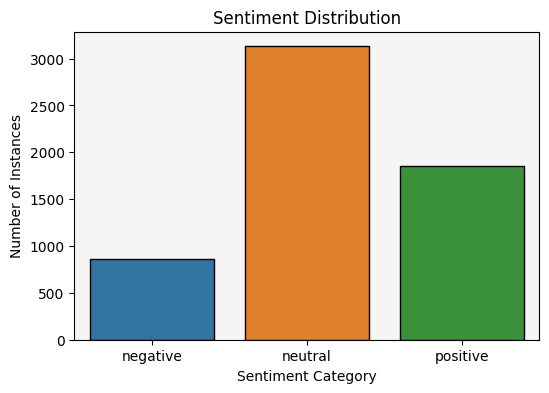

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Disable grid lines
plt.rcParams["axes.grid"] = False

# Set the grid color to light blue
plt.rcParams["axes.facecolor"] = "whitesmoke"

# Group the data by "Category" and count the instances
category_counts = df.groupby("Sentiment").size().reset_index(name="Count")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Sentiment", y="Count", data=category_counts, edgecolor="black")

# Add title and labels
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Instances")

# Show the plot
plt.show()

The barplot shows the distribution of sentiment categories in the dataset, with 'neutral' being the most frequent sentiment category with 3150 instances. 'Positive' and 'negative' sentiments are the next two most common categories, with around 1852 and 860 instances, respectively. The plot suggests that the majority of instances in the dataset are classified as neutral. It is evident that significant class imbalance in the dataset.

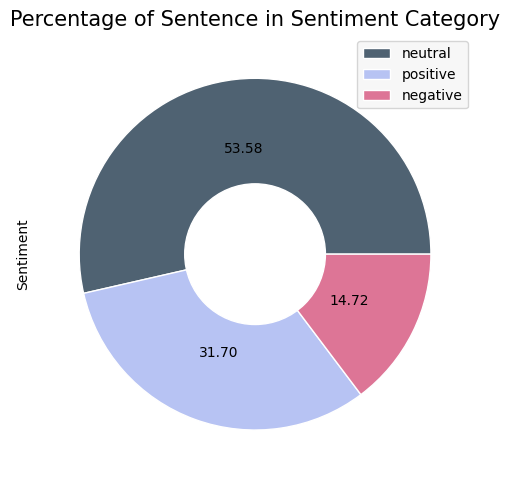

In [ ]:
# Count the values of each sentiment category
category_counts = df.Sentiment.value_counts()

# Get the labels in the correct order
labels = category_counts.index.tolist()

colors = ['#4F6272', '#B7C3F3', '#DD7596']
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))
category_counts.plot(kind='pie', labels=None, autopct='%.2f', ax=ax1, 
                     wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, colors=colors)

# Pass the labels in the correct order to the legend
ax1.legend(labels=labels)

central_circle = plt.Circle((0, 0), 0.4, color='white')
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Percentage of Sentence in Sentiment Category', size=15)
plt.tight_layout()
plt.savefig('/content/donut_chart.png', dpi=300)
plt.show()

The pie chart shows the distribution of sentiment categories in the dataset. The majority of sentences are labeled as neutral (53.58%), followed by positive (31.70%) and negative (14.72%). This indicates that the dataset is also imbalanced towards neutral sentiment. It is important to note that imbalanced datasets can impact the performance of sentiment analysis models and should be taken into consideration during model development and evaluation.

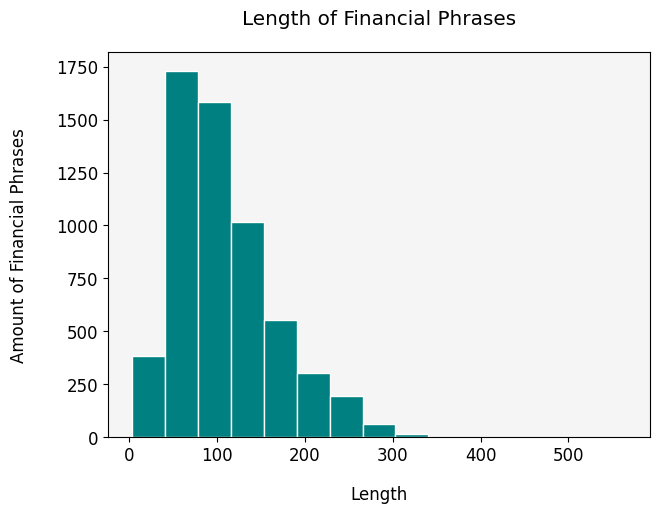

In [ ]:
# Length of Financial Phrases
df["Length"] = df["Sentence"].astype(str).apply(len)
df["Length"].plot(kind = "hist", bins = 15, linewidth = 1, color = "teal", figsize = (7,5), edgecolor="white")
plt.title("Length of Financial Phrases", pad = 20)
plt.xlabel("Length", labelpad = 15)
plt.ylabel("Amount of Financial Phrases",labelpad = 20)
plt.savefig('/content/length_of_Financial Phrases_1.png', dpi=300)
plt.show()

The histogram shows a distribution of financial phrases by their length. The most common length is around 50 with 1750 phrases, followed closely by length of around 100 with 1500 phrases. The third highest peak occurs at around 120 with 1000 phrases. The distribution shows a long-tail pattern with decreasing frequency as the length increases. 

The dataset comprises sentences with lengths varying from approximately 1 to 340 characters, indicating a diverse range of textual data.The presence of short-length (less than 10 characters) sentences may suggest data entry errors and necessitate further investigation. Conversely, longer sentences could represent a challenge for the model, potentially requiring additional preprocessing like sentence segmentation.

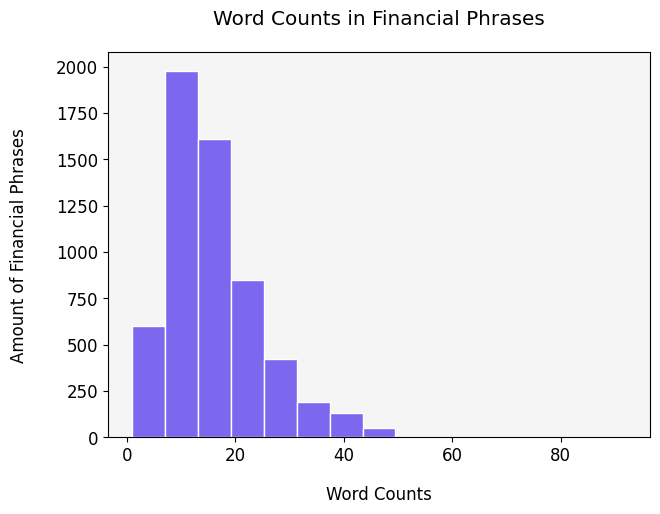

In [ ]:
#Word counts
df["Word Counts"] = df["Sentence"].apply(lambda x: len(str(x).split()))
df["Word Counts"].plot(kind = "hist", bins = 15, linewidth = 1, color = "MediumSlateBlue", figsize = (7,5), edgecolor="white")
plt.title("Word Counts in Financial Phrases", pad = 20)
plt.xlabel("Word Counts", labelpad = 15)
plt.ylabel("Amount of Financial Phrases", labelpad = 20)
plt.savefig('/word_counts_1.png', dpi=300)
plt.show()

The histogram represents the distribution of financial phrases by their word count. The highest frequency occurs at word counts of around 6-13 with 2000 phrases, followed by word counts of around 13-20 with 1500 phrases. The third highest peak occurs at word counts of around 20-26 with 750 phrases. The distribution shows a long-tail pattern with decreasing frequency as the word count increases.

The dataset includes text entries ranging from approximately 2 to 50 words, encompassing a wide spectrum of information densities. The occurrence of zero-word entries could be indicative of data irregularities that may require cleaning. The maximum length of 50 words per entry could include complex sentences, potentially influencing the model's performance in understanding and predicting sentiments.

In [ ]:
# Print summary statistics
word_count_stats = df['Word Counts'].describe()
print("Word Count Statistics:")
print(word_count_stats)

# Print summary statistics
length_stats = df['Length'].describe()
print("Length Statistics:")
print(length_stats)

Word Count Statistics:
count    5842.000000
mean       16.418692
std         8.592626
min         1.000000
25%        10.000000
50%        15.000000
75%        20.000000
max        92.000000
Name: Word Counts, dtype: float64
Length Statistics:
count    5842.000000
mean      108.587641
std        57.282702
min         4.000000
25%        65.000000
50%        97.000000
75%       139.000000
max       565.000000
Name: Length, dtype: float64


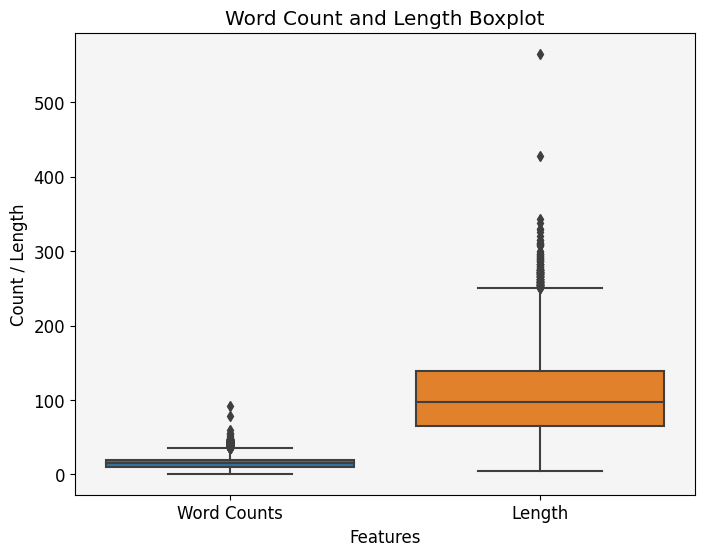

In [ ]:
#Boxplot of word counts and length
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Word Counts', 'Length']])
plt.title("Word Count and Length Boxplot")
plt.xlabel("Features")
plt.ylabel("Count / Length")
plt.show()

The boxplot shows the distribution of word counts and length in the dataset. The mean word count is around 16, with a minimum of 1 and maximum of 92. The mean sentence length is around 107, with a minimum of 1 and maximum of 565. Both distributions show a large spread of data, with many outliers. There are two significant outliers in length boxplot indicating very long sentences which can invested further. The boxplot also indicates that the distribution of word counts is slightly more skewed than the distribution of length.

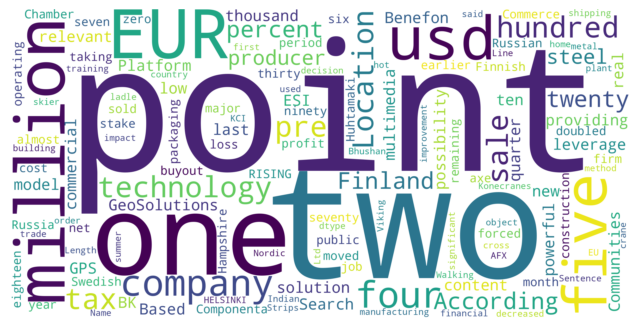

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize

#WordCloud
wc= WordCloud(background_color="white",random_state=1, max_words=2000, width = 3000, height = 1500).generate(str(df["Sentence"]))
plt.figure(figsize = (8,5))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.savefig('/content/wordcloud_1.png', dpi=300)
plt.show()

The word cloud can provide a quick overview of the most common words in a dataset. The size of the words indicates their frequency, with larger words appearing more often. In this dataset, the most common word is 'point', followed by 'two', ‘one’, 'eur', 'million', ‘usd’, 'five', and others. 

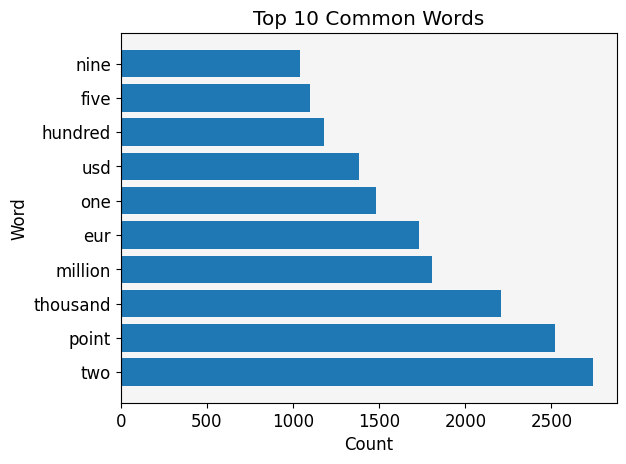

In [ ]:
# Create a CountVectorizer object to extract words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=stop_words)

# Fit the vectorizer to the sentences in the DataFrame
X = vectorizer.fit_transform(df["Sentence"])

# Get the count of each word
bigram_counts = X.sum(axis=0)

# Get the top 10 words and their counts
top_bigrams = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(top_bigrams, key=lambda x: x[1], reverse=True)[:10]

# Create a bar chart of the top 10 words and their counts
plt.barh([i for i in range(10)], [bigram[1] for bigram in top_bigrams], tick_label=[bigram[0] for bigram in top_bigrams])
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 10 Common Words")
plt.show()


The plot shows the top 10 most common words in the dataset. The most frequently occurring word is 'two' with over 2500 counts, followed closely by 'point' and 'thousand' with around 2500 counts and 2200 counts each. The remaining words have much lower counts, ranging from 1000 to 2000.

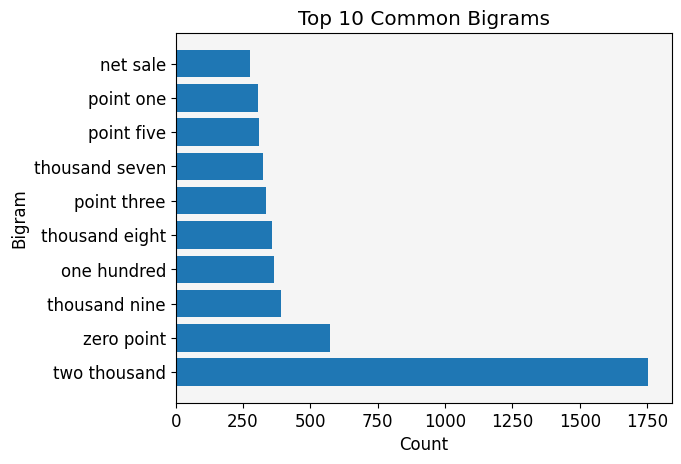

In [ ]:
# Create a CountVectorizer object to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)

# Fit the vectorizer to the sentences in the DataFrame
X = vectorizer.fit_transform(df["Sentence"])

# Get the count of each bigram
bigram_counts = X.sum(axis=0)

# Get the top 10 bigrams and their counts
top_bigrams = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(top_bigrams, key=lambda x: x[1], reverse=True)[:10]

# Create a bar chart of the top 10 bigrams and their counts
plt.barh([i for i in range(10)], [bigram[1] for bigram in top_bigrams], tick_label=[bigram[0] for bigram in top_bigrams])
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.title("Top 10 Common Bigrams")
plt.show()

The barplot illustrates the top 10 most common bigrams in the dataset, with 'two thousand' being the most frequent one with approximately 1750 counts. 'zero point' and 'thousand nine' are the next two most common bigrams with around 600 and 400 counts, respectively. The presence of these bigrams suggests that the dataset might be related to years or financial transactions, where phrases such as 'two thousand' and 'zero point' are commonly used. The rest of the bigrams are less frequent, with counts ranging from 250 to 350.



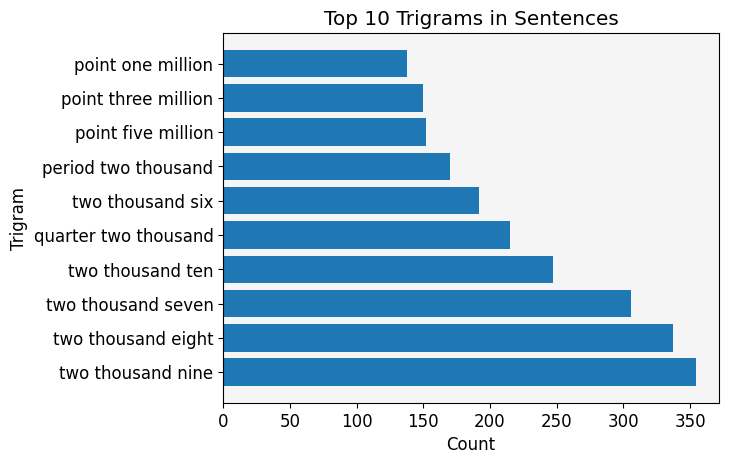

In [ ]:
# Create a CountVectorizer object to extract trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words)

# Fit the vectorizer to the sentences in the DataFrame
X = vectorizer.fit_transform(df["Sentence"])

# Get the count of each bigram
bigram_counts = X.sum(axis=0)

# Get the top 10 trigrams and their counts
top_bigrams = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(top_bigrams, key=lambda x: x[1], reverse=True)[:10]

# Create a bar chart of the top 10 trigrams and their counts
plt.barh([i for i in range(10)], [bigram[1] for bigram in top_bigrams], tick_label=[bigram[0] for bigram in top_bigrams])
plt.xlabel("Count")
plt.ylabel("Trigram")
plt.title("Top 10 Trigrams in Sentences")
plt.show()

The barplot displays the top 10 most common trigrams in the dataset, with 'two thousand nine' being the most frequent one with over 350 counts. 'Two thousand eight' and 'two thousand seven' are the next two most common trigrams with around 350 and 300 counts, respectively. The high frequency of these trigrams suggests that the dataset might be related to financial or economic data where years and quarters are commonly used. The remaining trigrams have lower frequencies, ranging from 100 to 250 counts.

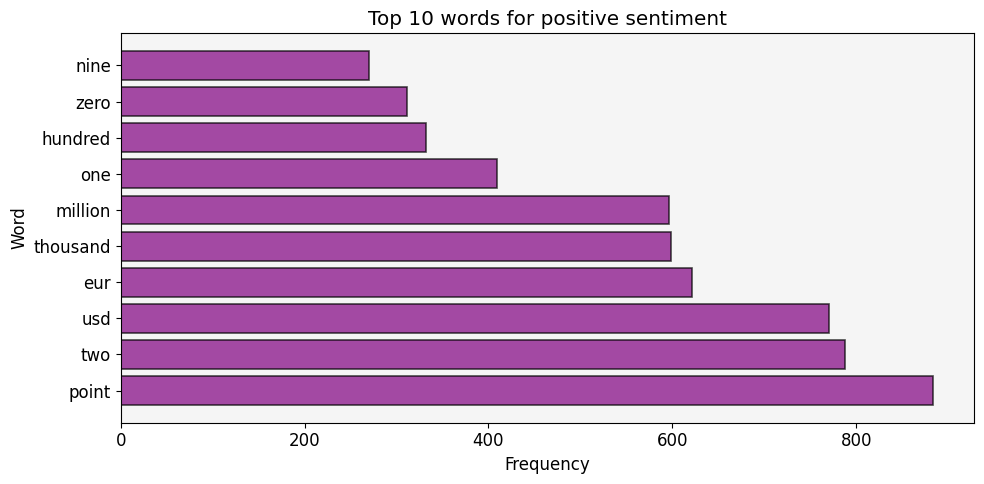

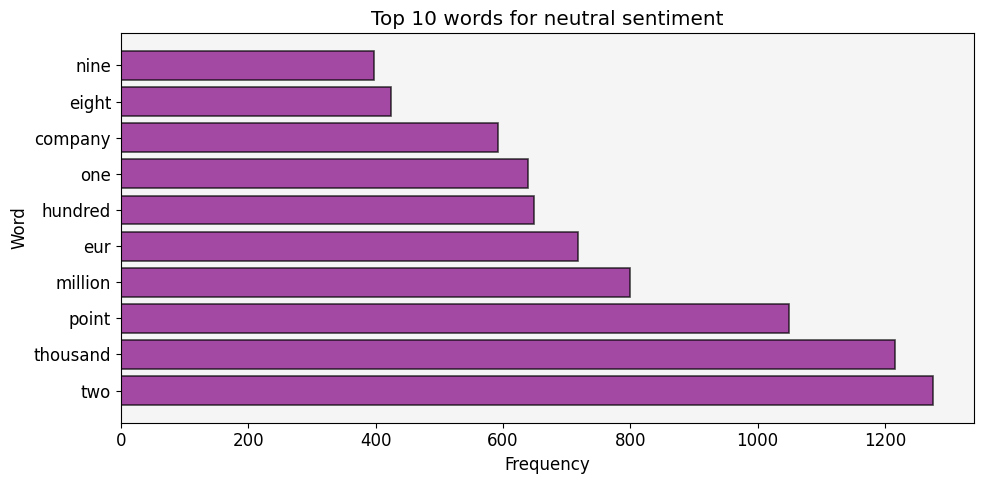

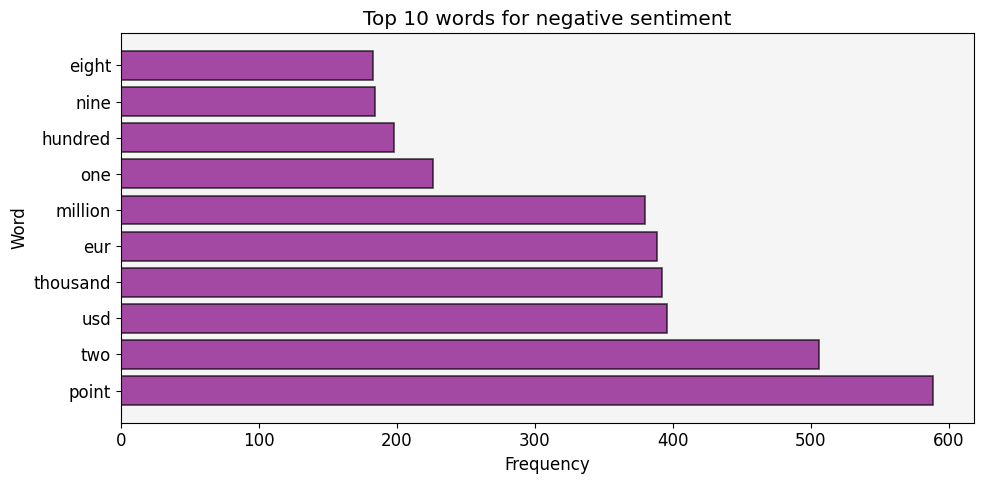

In [ ]:
# Create a dictionary to store the top 10 words for each sentiment category
top_words = {'positive': [], 'neutral': [], 'negative': []}

# Extract the top 10 words for each sentiment category
for sentiment in top_words:
    # Combine all sentences with the same sentiment into one string
    sentences_sentiment = ' '.join(df.loc[df['Sentiment'] == sentiment, 'Sentence'].tolist())
    # Tokenize the sentences
    tokens = nltk.word_tokenize(sentences_sentiment)
    
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
    # Calculate the frequency of each token
    freq_dist = nltk.FreqDist(tokens)
    # Add the top 10 tokens to the dictionary
    top_words[sentiment] = freq_dist.most_common(10)

# Create a bar chart of the top 10 words for each sentiment category
for sentiment in top_words:
    plt.figure(figsize=(10, 5))
    plt.title(f'Top 10 words for {sentiment} sentiment')
    plt.barh([pair[0] for pair in top_words[sentiment]], [pair[1] for pair in top_words[sentiment]], color='purple', edgecolor='black', linewidth=1.2, alpha=0.7)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()


Top 10 Words for Positive Sentiment:
The barplot illustrates the top 10 most common positive sentiment words in the dataset, with 'point' being the most frequent one with over 800 counts. 'two' and 'usd' are the next two most common words with around 800 counts, respectively. The rest of the words are less frequent, with counts ranging from 200 to 650.

---
Top 10 Words for Neutral Sentiment:
The plot displays the top 10 most common neutral sentiment words in the dataset. The most frequently occurring word is 'two' with over 1200 counts, followed by 'thousand' and 'point' with around 1200 and 1000 counts, respectively. The remaining words have lower counts, ranging from 300 to 800.


---

Top 10 Words for Negative Sentiment:
The plot displays the top 10 most common negative sentiment words in the dataset. The most frequently occurring word is 'point' with around 600 counts, followed by 'two' and 'usd' with around 500 and 400 counts, respectively. The remaining words have lower counts, ranging from 150 to 400.


In [ ]:
df.columns

Index(['Sentence', 'Sentiment', 'label', 'Length', 'Word Counts'], dtype='object')

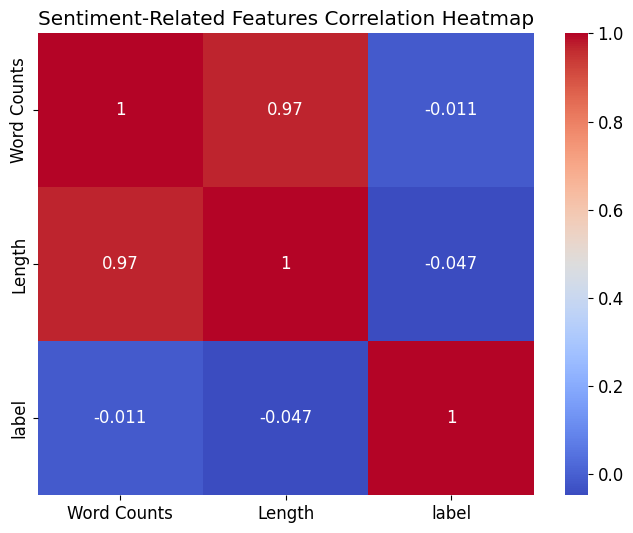

In [ ]:
#Create a subset_df for selected columns
subset_df = df[['Word Counts', 'Length', 'label']]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sentiment-Related Features Correlation Heatmap")
plt.show()

The plot shows the correlation between three features in the dataset: 'word counts', 'length', and 'label'. In this case, the correlation between 'word counts' and 'length' is very high at 0.97, suggesting that the length of the financial phrases is highly correlated with the number of words used in the phrase. The correlation between 'word counts' and 'label' is lower at -0.0028, indicating a weak negative correlation, while the correlation between 'label' and 'length' is also weak at -0.042. 

In [ ]:
df = df.drop(['Length', 'Word Counts'], axis=1)
df.columns

Index(['Sentence', 'Sentiment', 'label'], dtype='object')

## Prepare training/validation/testing datasets


Splitting the dataset into training, testing and validation sets is done using the train_test_split function from the scikit-learn library.

The 'stratify' parameter ensures that the proportion of target labels in each split is the same as that in the original dataset.

The 'test_size' parameter specifies the percentage of data to be allocated to the testing set.

The 'random_state' parameter ensures that the same splits are obtained every time the code is run.


These lines split the dataset df into training, validation, and testing sets using train_test_split() function from the sklearn library.The 'stratify' parameter is used to ensure that the proportion of the target classes is the same in the training, validation, and testing sets. The split ratio is 90% for training and 10% for testing and validation each. 

The shape of the resulting df_train, df_test, and df_val dataframes is printed to check that the split has been performed correctly.

In [ ]:
df_train, df_test, = train_test_split(df, stratify=df['label'], test_size=0.1, random_state=42)
df_train, df_val = train_test_split(df_train, stratify=df_train['label'],test_size=0.1, random_state=42)
print(df_train.shape, df_test.shape, df_val.shape)

(4731, 3) (585, 3) (526, 3)


# **BERT MODEL**

## Loading BERT:  pretrained model


Here we initializes a BERT model for sequence classification and a corresponding tokenizer.

BertForSequenceClassification is a pre-trained BERT model from the Hugging Face Transformers library that is fine-tuned for sequence classification tasks. In this case it is initialized with the pre-trained weights of the bert-base-uncased model and the number of labels set to 3. The bert-base-uncased model is a smaller version of the BERT model architecture that has been trained on uncased English text.

The BertTokenizer is used to preprocess input text so that it can be fed into the BertForSequenceClassification model. It converts the input text into a format that the model can understand, which involves tokenizing the text into individual subwords and encoding them as numerical values.

Overall, this code initializes a BERT model and tokenizer for sequence classification tasks and sets up the pre-trained weights and settings needed to perform inference on new data.

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

### Prepare dataset for fine-tuning 

This block of code creates 'Dataset' objects from the training, validation, and test sets, which are originally stored in pandas DataFrames

Each DataFrame is converted to a 'Dataset' using the 'from_pandas' method of the 'Dataset' class

Then, each 'Dataset' is tokenized using the 'tokenizer' object, with padding and truncation applied to ensure that each input has a fixed length of 128

Finally, the 'set_format' method is called on each 'Dataset' to specify the format and columns to be used when the data is fed into the model

In [ ]:
dataset_train = Dataset.from_pandas(df_train) ## Creating a 'Dataset' object from the training set DataFrame 'df_train'
dataset_val = Dataset.from_pandas(df_val)  ## Creating a 'Dataset' object from the validation set DataFrame 'df_val'
dataset_test = Dataset.from_pandas(df_test)  # # Creating a 'Dataset' object from the test set DataFrame 'df_test'


#Tokenizing each 'Dataset' using the 'tokenizer' object with padding and truncation applied
dataset_train = dataset_train.map(lambda e: tokenizer(e['Sentence'], truncation=True, padding='max_length', max_length=128), batched=True)
dataset_val = dataset_val.map(lambda e: tokenizer(e['Sentence'], truncation=True, padding='max_length', max_length=128), batched=True)
dataset_test = dataset_test.map(lambda e: tokenizer(e['Sentence'], truncation=True, padding='max_length' , max_length=128), batched=True)
#Setting the format and columns of each 'Dataset' to be used when the data is fed into the model
dataset_train.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_val.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_test.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])


Map:   0%|          | 0/4731 [00:00<?, ? examples/s]

Map:   0%|          | 0/526 [00:00<?, ? examples/s]

Map:   0%|          | 0/585 [00:00<?, ? examples/s]

### Defining training method

In [ ]:
!pip install git+https://github.com/huggingface/accelerate
#This line of code installs the 'accelerate' package from the Hugging Face library via pip.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-d8xh7x2u
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-d8xh7x2u
  Resolved https://github.com/huggingface/accelerate to commit dcde1e93d09abea02a8e7f4a07a2c5734b87b60e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.20.0.dev0-py3-none-any.whl size=222965 sha256=180cd5b525dde5291eace81e8fa1071525a155be2dd067583e6415eadb8f716b
  Stored in directory: /tmp/pip-ephem-wheel-cache-g9v7_il7/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate


### Defining training method

The 'accelerate' library is designed to optimize the training and inference process for deep learning models, including BERT. 

The benefit from its functionalities such as automatic mixed-precision training, gradient accumulation, and distributed training across multiple GPUs or machines can be achieved.



---

The following cell defines a function compute_metrics that takes eval_pred as input and returns a dictionary containing the accuracy score computed using sklearn's accuracy_score function.

Then, the code sets up the training arguments using TrainingArguments from the transformers library. The arguments include the output directory for storing the trained model, the evaluation strategy, the learning rate, the batch sizes, the number of training epochs, the weight decay, and other parameters.

The Trainer object is then instantiated using the defined model, the training and evaluation datasets, the compute_metrics function, and the TrainingArguments. Finally, the train() method is called on the Trainer object to train the model.

In [ ]:
# Define a function to compute the evaluation metrics
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'accuracy' : accuracy_score(predictions, labels)}
# Set up the training arguments

args = TrainingArguments(
        output_dir = '/content/temp/',   ## Directory to save the trained model
        evaluation_strategy = 'epoch',   ## Evaluate the model after every epoch
        save_strategy = 'epoch',   ## Save the model after every epoch
        learning_rate=2e-5,         ## Learning rate for the optimizer
        per_device_train_batch_size=64,  ## Batch size for training
        per_device_eval_batch_size=64,   ## Batch size for evaluation
        num_train_epochs=5,             # Number of training epochs
        weight_decay=0.01,              # Weight decay for regularization
        load_best_model_at_end=True,      # Load the best model at the end of training
        metric_for_best_model='accuracy',   # Metric to use for determining the best model
)

trainer = Trainer(
        model=model,                          # The pre-trained model to be trained
        args=args,                  # # Training arguments
        train_dataset=dataset_train,         # training dataset
        eval_dataset=dataset_val,            # evaluation dataset
        compute_metrics=compute_metrics    # Function to compute evaluation metrics
)
# Train the model
trainer.train()   

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.755866,0.678707
2,No log,0.588201,0.752852
3,No log,0.552031,0.760456
4,No log,0.568497,0.754753
5,No log,0.565988,0.756654


TrainOutput(global_step=370, training_loss=0.518219365300359, metrics={'train_runtime': 131.323, 'train_samples_per_second': 180.128, 'train_steps_per_second': 2.817, 'total_flos': 1555986974088960.0, 'train_loss': 0.518219365300359, 'epoch': 5.0})

The model has been trained for five epochs, with a total of 370 steps in the training phase. There's a steady improvement in accuracy from 67.9% to 75.7% on the validation set, signifying successful learning. However, the validation loss shows a decrease until the third epoch, followed by a slight increase, suggesting a potential onset of overfitting. The final training loss is approximately 0.52. 

## Model evaluation

This part of code evaluates the fine tuned model using the test dataset. 

 The code snippet imports the functions confusion_matrix, f1_score, and classification_report from the sklearn.metrics module, which are used to evaluate the performance of a classifier.

In [ ]:
#Import necessary functions
from sklearn.metrics import confusion_matrix, f1_score,classification_report


model.eval() function sets the model to evaluation mode, which turns off features like dropout and batch normalization that are used during training to prevent overfitting.

'trainer.predict(dataset_test).metrics' refers to a code snippet that uses a Trainer object (from the transformers library) to make predictions on a test dataset and calculate evaluation metrics.
It invokes the 'predict' method od 'Trainer' object and uses 'dataset_test' as input. 
The 'predict' method applies trained model to input test dataset and maeks predictions.

The metrics attribute contains evaluation metrics calculated based on the model predictions and the ground truth labels from the test dataset.

The metrics attribute typically provides various evaluation metrics such as accuracy, precision, recall, F1-score, depending on the configuration of the Trainer object.

In [ ]:

#These two lines evaluate the trained model on the test dataset.
model.eval()   

#Predicting sentiment of test dataset
trainer.predict(dataset_test).metrics                                                                                                       
                                                                                                          
                                                                                                          
                                                                                                          
                                                                                                                    


{'test_loss': 0.5075996518135071,
 'test_accuracy': 0.7726495726495727,
 'test_runtime': 0.968,
 'test_samples_per_second': 604.333,
 'test_steps_per_second': 10.33}

The model demonstrates a test accuracy of approximately 77.3%, which is a solid performance, although slightly lower than the validation accuracy. The test loss stands at 0.51, which is relatively close to the final training loss, implying the model has generalised well.

The code snippet generates predictions on the test dataset using the predict method of the Trainer class, and stores the predictions in the 'pred' variable.

In [ ]:
#This line generates predictions on the test dataset using the predict method of the Trainer class, and stores the predictions in the pred variable.
pred=trainer.predict(dataset_test)             

The following cell extracts the predicted labels from the 'pred' variable by taking the argmax along the last axis of the predictions array, and stores the predicted labels in the 'pred_labels' variable. The argmax function returns the index of the maximum value along a given axis, which corresponds to the predicted label for each input.

In [ ]:
 #Predicted labels from the pred variable using argmax
pred_labels=pred.predictions.argmax(axis=-1)             


The code down below computes the confusion matrix for the predictions made by the model on the test dataset. It first extracts the true labels of the test dataset from the label column of the dataset_test object, and stores them in the true_labels variable.

Then it uses the confusion_matrix function from sklearn.metrics to compute the confusion matrix of the predicted labels (pred_labels) and true labels (true_labels), and stores the result in the conf_matrix variable. The confusion matrix is a table that summarizes the number of correct and incorrect predictions made by a classifier, organized by true and predicted label.

In [ ]:
# Calculate the confusion matrix
true_labels = dataset_test['label']    
conf_matrix = confusion_matrix(true_labels, pred_labels)


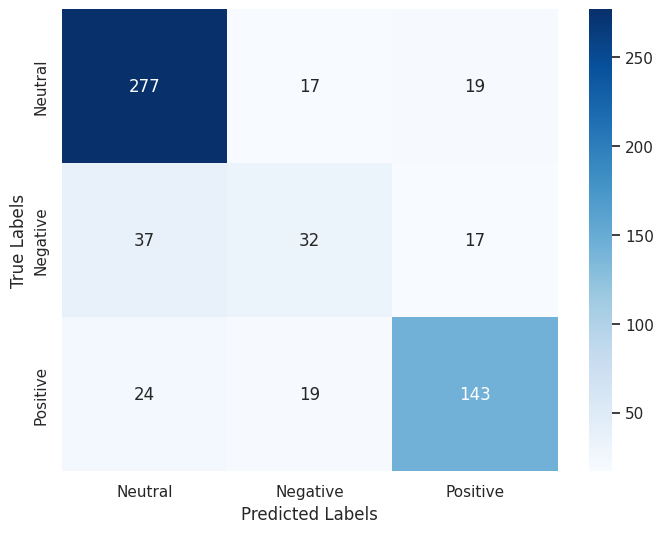

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 6))
category_names = ['Neutral', 'Negative', 'Positive']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')
plt.show()


In [ ]:
# Calculate the F1 score
f1 = f1_score(true_labels, pred_labels, average='macro')

# Print the results
print('Confusion Matrix:')
print(conf_matrix)
print('F1 Score:', f1)


class_report = classification_report(true_labels, pred_labels, target_names=['neutral', 'negative', 'positive'])

print('\nClassification Report:')
print(class_report)

Confusion Matrix:
[[277  17  19]
 [ 37  32  17]
 [ 24  19 143]]
F1 Score: 0.6833815077739073

Classification Report:
              precision    recall  f1-score   support

     neutral       0.82      0.88      0.85       313
    negative       0.47      0.37      0.42        86
    positive       0.80      0.77      0.78       186

    accuracy                           0.77       585
   macro avg       0.70      0.68      0.68       585
weighted avg       0.76      0.77      0.77       585



The confusion matrix and classification report reveal more detailed information about the model's performance. It appears to perform well on 'neutral' and 'positive' classes, with f1-scores of 0.85 and 0.78 respectively. However, the model struggles with the 'negative' class, reflected in its lower f1-score of 0.42. This may be due to class imbalance in the dataset. Overall, the model's accuracy and weighted average f1-score align at around 77%, yet the macro average f1-score is lower at 68%, suggesting some imbalance in the model's ability to correctly classify different sentiment classes. The precision and recall scores further confirm these observations.

The code below illustrates the creation of a dual-axis line graph using Python's Matplotlib library. It plots validation loss (in red) and validation accuracy (in blue) against the number of training epochs. The 'eval_loss' and 'eval_accuracy' values are extracted from the 'log_history' of a trainer object, presumably from a machine learning model. This visualization is useful for observing the performance and convergence of the model over time.

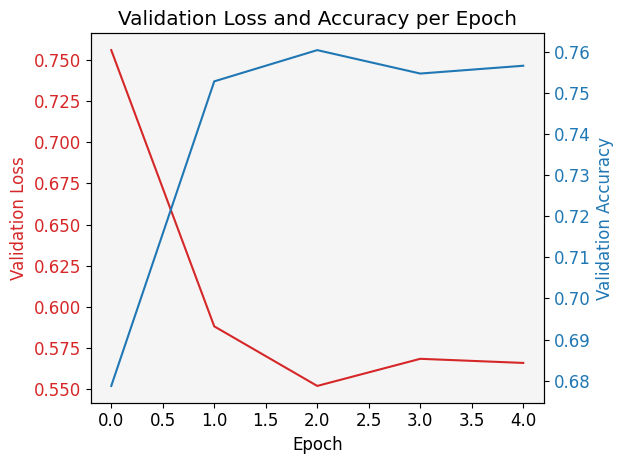

In [ ]:
#Plot the accuracy and loss graph
val_loss = []
val_accuracy = []
for elem in trainer.state.log_history:
    if 'eval_loss' in elem.keys():
        val_loss.append(elem['eval_loss'])
        val_accuracy.append(elem['eval_accuracy'])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Loss', color=color)
ax1.plot(val_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Validation Accuracy', color=color)
ax2.plot(val_accuracy, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Validation Loss and Accuracy per Epoch')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The graph above shows validation loss and accuracy of the BERT model indicating that the model is performing well.

The following cell saves the trained model as *bert-sentiment* to the directory "finbert-sentiment". This saved model can be later loaded and used for inference or further training.

In [ ]:
#Save trained BERT model
trainer.save_model('bert-sentiment')   

###**TRADITIONAL METHODS - TFIDF, SVM , LOGOSTIC REGRESSION**

We now spilt our data again to predict the sentiment using traditional models like logistic regression and support vector classification. The data is pilt such that X:sentence represents independent variable and y: label represents depedent variable. 

These algorithms will predict the sentiment of each sentence.

In [ ]:
###**TRADITIONAL METHODS - TFIDF, SVM , LOGOSTIC REGRESSION**
X_train=df_train['Sentence']   
y_train=df_train['label']


X_val=df_val['Sentence']
y_val=df_val['label']


X_test=df_test['Sentence']
y_test=df_test['label']


## Using TF-IDF Vectorization

The 'TfidfVectorizer' from 'scikit-learn' and uses it to convert the raw text in the training and test sets into TF-IDF feature vectors.

TfidfVectorizer is a method for converting a collection of raw documents into a matrix of TF-IDF features. TF-IDF stands for term frequency-inverse document frequency, which is a way of weighing the importance of each word in a document based on how frequently it appears in the document and how common it is across all documents in the corpus.

The fit_transform method is called on the training data X_train, which learns the vocabulary from the training set and transforms it into a sparse matrix of TF-IDF features. The transform method is then called on the test set X_test, which applies the same vocabulary and transforms the test set into a sparse matrix of TF-IDF features using the IDF weights learned from the training set.

Overall, code below depicts the usage of TF-IDF vectorizer to convert raw text into a numerical format that can be used as input to machine learning models for tasks such as classification. This operation is performed by using fit_transform() function of TfidfVectorizer() function from sklearn.feature.extraction.text library. 
TF_IDF matrix of train dataset is stored in tf_x_train variable and that of test dataset in tf_x_test varibale.

In [ ]:
#Importing necessary libraries abd functions
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)


## IMPLEMENTING SVM FOR CLASSIFICATION

We import LinearSVC() function from sklearn.svm library and assign it to variable clf. We then perform classification using fit() function. 

In [ ]:
# IMPLEMENTING SVM FOR CLASSIFICATION
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,y_train)


LinearSVC(random_state=0)

## Model evaluation

clf.predict(tf_x_test) is calling the predict method on the trained classifier clf, which takes the TF-IDF feature matrix of the test data as input and returns predicted class labels for each sample in the test set. The predicted class labels are stored in the y_test_pred variable.

In other words, this code is using the trained classifier to predict the class labels for the test set, which can be compared to the true class labels y_test to evaluate the performance of the classifier.

In [ ]:
#Test results 
y_test_pred=clf.predict(tf_x_test)  

The code snippet uses scikit-learn's classification_report function to generate a report of key classification metrics, including precision, recall, and F1-score, for each class ('neutral', 'negative', 'positive') in a multiclass problem. It takes as input the true labels (y_test) and the predicted labels (y_test_pred). 

In [ ]:
#Making a report of the predicted classification
from sklearn.metrics import classification_report, confusion_matrix
report=classification_report(y_test, y_test_pred,target_names=['neutral', 'negative', 'positive'])


The code snippet generates a confusion matrix, a useful tool for understanding a model's performance in a classification task. This matrix is displayed as a heatmap using seaborn and matplotlib, with 'Neutral', 'Negative', and 'Positive' as the class labels. Each cell in the matrix shows the number of instances of a class (true labels) predicted as each class (predicted labels). This visualization helps in identifying the misclassifications and analyzing the model's behavior across different classes.

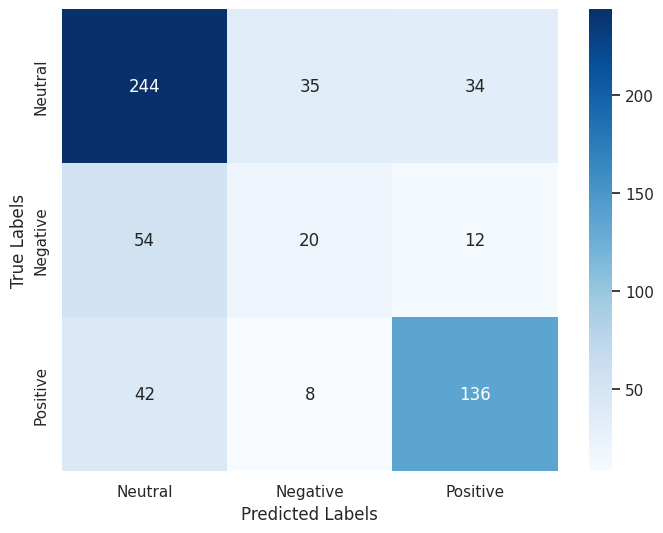

In [ ]:
#Building and creating a heatmap of confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_test_pred)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 6))
category_names = ['Neutral', 'Negative', 'Positive']
sns.heatmap(conf_matrix3, annot=True, cmap='Blues', fmt='g', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')
plt.show()


In [ ]:
#Printing the performance report of model
print(report)

              precision    recall  f1-score   support

     neutral       0.72      0.78      0.75       313
    negative       0.32      0.23      0.27        86
    positive       0.75      0.73      0.74       186

    accuracy                           0.68       585
   macro avg       0.59      0.58      0.58       585
weighted avg       0.67      0.68      0.67       585



The Support Vector Classifier model results show an overall accuracy of 68% which is considerably lower compared to the BERT model. Notably, it struggles to correctly classify the 'negative' class, with a precision of 0.32 and a recall of 0.23, resulting in a low f1-score of 0.27. The model performs better on 'neutral' and 'positive' classes, but the performance is still less satisfactory when compared to the BERT model.

# **Logistic regression**

We import LosgisticRegression function from sklearn.linear_model library and assign it to variable lr. We then perform classification using fit() function. 

clf.predict(tf_x_test) is calling the predict method on the trained classifier clf, which takes the TF-IDF feature matrix of the test data as input and returns predicted class labels for each sample in the test set. The predicted class labels are stored in the y_test_pred variable.

In other words, this code is using the trained classifier to predict the class labels for the test set, which can be compared to the true class labels y_test to evaluate the performance of the classifier.

In [ ]:
#mporting LinearRegression function and assigning it to variable lr
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,solver='saga')
lr.fit(tf_x_train,y_train)
y_test_pred2=lr.predict(tf_x_test)
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix4= confusion_matrix(y_test, y_test_pred2)

The code snippet generates a confusion matrix, a useful tool for understanding a model's performance in a classification task. This matrix is displayed as a heatmap using seaborn and matplotlib, with 'Neutral', 'Negative', and 'Positive' as the class labels. Each cell in the matrix shows the number of instances of a class (true labels) predicted as each class (predicted labels). This visualization helps in identifying the misclassifications and analyzing the model's behavior across different classes.

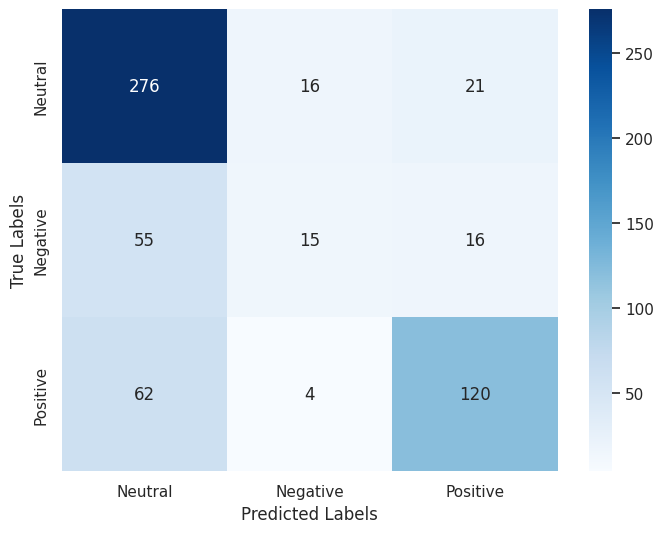

In [ ]:
#Creating a heatmap of confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 6))
category_names = ['Neutral', 'Negative', 'Positive']
sns.heatmap(conf_matrix4, annot=True, cmap='Blues', fmt='g', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')
plt.show()



The code snippet uses scikit-learn's classification_report function to generate a report of key classification metrics, including precision, recall, and F1-score, for each class ('neutral', 'negative', 'positive') in a multiclass problem. It takes as input the true labels (y_test) and the predicted labels (y_test_pred) and is stored in variable lr_report.

In [ ]:
#Generating a report matrix
lr_report=classification_report(y_test, y_test_pred2,target_names=['neutral', 'negative', 'positive'])
print(lr_report)

              precision    recall  f1-score   support

     neutral       0.70      0.88      0.78       313
    negative       0.43      0.17      0.25        86
    positive       0.76      0.65      0.70       186

    accuracy                           0.70       585
   macro avg       0.63      0.57      0.58       585
weighted avg       0.68      0.70      0.68       585



The Logistic Regression model achieves a 70% accuracy, with high performance in predicting 'neutral' sentiments (f1-score: 0.78) and relatively lower performance in 'negative' sentiments (f1-score: 0.25). This suggests the model's ability to predict 'neutral' sentiments is strong, but it struggles with accurately identifying 'negative' sentiments. Also, it is not performing as good as BERT model.



---



**Conclusion:** It is evident that accuracy of BERT and FINBERT is 77% and 79% respectively while traditional models i.e. logistic regression have accuracy of 0.70 or 70%  and SVC has 0.68 or is 68% accuracy. The accuracy of FINBERT is more than BERT but difference is not significance. This may be due the limited datapoints and significant class imbalance in the dataset. The performance of FinBERT, like any fine-tuned model, heavily depends on the quality of the data it was fine-tuned on. We are using a pre-trained model and it may be possible that fine-tuning data was noisy, not representative of the test data, or simply not large enough i.e. does not have large corpus, thus BERT could potentially outperform FinBERT.